# Dataset Analysis

Dataset source: https://exoplanetarchive.ipac.caltech.edu/docs/counts_detail.html

Dataset type: Planetary Systems Composite Parameters

Dataset exported on **2023-04-01**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exoplanet_dataset.csv')

# Drop the uncertainties and limit columns to simplify the data
df = df.drop([col_name for col_name in df if col_name.endswith(('err1', 'err2', 'lim'))], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 90 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5322 non-null   object 
 1   hostname         5322 non-null   object 
 2   sy_snum          5322 non-null   int64  
 3   sy_pnum          5322 non-null   int64  
 4   sy_mnum          5322 non-null   int64  
 5   cb_flag          5322 non-null   int64  
 6   discoverymethod  5322 non-null   object 
 7   disc_year        5322 non-null   int64  
 8   disc_locale      5322 non-null   object 
 9   disc_facility    5322 non-null   object 
 10  disc_telescope   5322 non-null   object 
 11  disc_instrument  5322 non-null   object 
 12  rv_flag          5322 non-null   int64  
 13  pul_flag         5322 non-null   int64  
 14  ptv_flag         5322 non-null   int64  
 15  tran_flag        5322 non-null   int64  
 16  ast_flag         5322 non-null   int64  
 17  obm_flag      

In [2]:
df.describe()

,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,...,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag
count,5322.000000,5322.000000,5322.0,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,...,3272.000000,3060.000000,4913.000000,4914.000000,4914.000000,4913.000000,5084.000000,320.000000,5130.000000,3368.000000
mean,1.101654,1.760616,0.0,0.008455,2015.827696,0.362270,0.001315,0.000376,0.754416,0.004322,...,13.878309,13.866549,10.566070,10.586229,10.374975,8.342227,12.396938,8.790294,11.824378,13.957923
std,0.337475,1.150817,0.0,0.091573,4.355319,0.480701,0.036247,0.019384,0.430474,0.065603,...,1.402806,1.220597,2.957479,2.991545,2.732791,1.620121,3.001554,4.601928,2.994992,1.565837
min,1.000000,1.000000,0.0,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.713000,7.469000,-2.104000,-1.241000,-2.783000,-3.227000,2.926270,2.051000,-1.200000,5.973000
25%,1.000000,1.000000,0.0,0.000000,2014.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,13.120000,13.240225,9.032000,9.046250,8.993750,8.287000,10.659525,6.066250,10.119200,13.095750
50%,1.000000,1.000000,0.0,0.000000,2016.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,14.157700,14.055000,11.507000,11.538500,11.420500,8.968000,13.311150,7.930000,12.795600,14.269500
75%,1.000000,2.000000,0.0,0.000000,2019.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,14.947000,14.770250,12.814000,12.866500,12.493000,9.312000,14.783525,10.150000,14.199125,15.149250
max,4.000000,8.000000,0.0,1.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.307700,17.025900,16.549000,16.038000,13.444000,9.890000,20.186100,36.350000,19.286900,17.475000


# What is an exoplanet?

An exoplanet is a planet located outside of our solar system. While most orbit around other stars, some exoplanets freely float around the galaxy instead, known as rogue planets. For every star you see in the night sky, on average, has at least one planet. Majority of exoplanets found to date are located in the Milky Way which is only a small sample of the galaxy. In a decade, the number of exoplanets discovered could potentially increase to tens of thousands as more robotic telescopes are launched into space with better observing capabilities.



# Number of confirmed discoveries

As of export date, there are currently **5322** confirmed exoplanets from 3989 different planetary systems!
Largest batch of discoveries happened through Kepler space telescope in 2016.

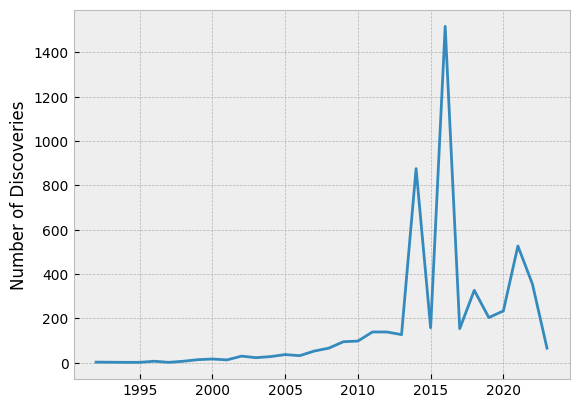

In [3]:
plt.style.use('bmh')
plt.ylabel('Number of Discoveries')
discovery = df['disc_year'].value_counts().sort_index()
discovery.plot(kind='line')
plt.show()

# How do we find exoplanets?

#### Transit
- Searching for shadows
- When planet passes directly between its star and an observer, it dims the star's light by a measureable amount
- 3982 planets discovered (74.8%)
#### Radial Velocity
- Watching for wobble
- Orbiting planets cause stars to wobble in space, changing the color of the light astronomers observe
- 1032 planets discovered (19.4%)
#### Gravitational Microlensing
- Light in a gravity lens
- Light from distant star is bent and focused by gravity as a planet passes between the star and Earth
- 181 planets discovered (3.4%)
#### Direct Imaging
- Taking pictures
- Astronomers can take pictures of exoplanets by removing the overwhelming glare of the stars they orbit
- 64 planets discovered (1.2%)
#### Transit Timing Variations
- 25 planets discovered (0.47%)
#### Eclipse Timing Variations
- 17 planets discovered (0.32%)
#### Orbital Brightness Modulation
- 9 planets discovered (0.17%)
#### Pulsar Timing
- 7 planets discovered (0.13%)
#### Astrometry
- Minuscule movements
- The orbit of a planet can cause a star to wobble around in space in relation to nearby stars in the sky
- 2 planets discovered (0.04%)
#### Pulsation Timing Variations
- 2 planets discovered (0.04%)
#### Disk Kinematics
- 1 planet discovered (0.02%)

In [4]:
discovery_methods = df.groupby('discoverymethod').agg(count=('discoverymethod', 'count')).sort_values(by='count', ascending=False)
discovery_methods.reset_index()
discovery_methods['percentage'] = round(100 * discovery_methods['count'] / discovery_methods['count'].sum(), 2)
discovery_methods

,count,percentage
discoverymethod,,
Transit,3982,74.82
Radial Velocity,1032,19.39
Microlensing,181,3.40
Imaging,64,1.20
Transit Timing Variations,25,0.47
Eclipse Timing Variations,17,0.32
Orbital Brightness Modulation,9,0.17
Pulsar Timing,7,0.13
Astrometry,2,0.04


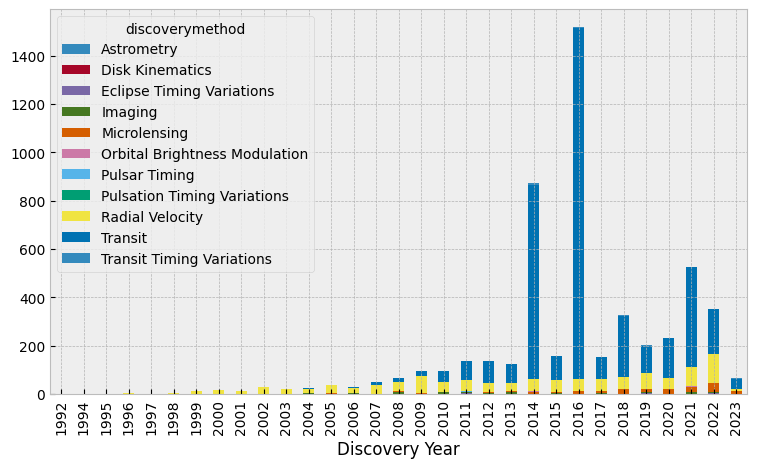

In [5]:
df.groupby(['disc_year','discoverymethod']).size().unstack().plot.bar(stacked=True,figsize=(9,5))
plt.xlabel('Discovery Year')
plt.show()

# Exoplanet types

#### Neptunian
- similar in size to Neptune or Uranus that typically have hydrogen and helium-dominated atmospheres with cores of rock and heavier metals.
- 1835 planets discovered
#### Gas giant
- a giant planet composed mainly of gas (helium and or hydrogen)
- 1679 planets discovered
- "hot Jupiters", gas giants nearer to their stars make such tight orbits that they cause a pronounced wobble in their stars, making it easier to detect using the radial velocity method.
#### Super-Earth
- more massive than Earth yet lighter than ice giants like Neptune and Uranus, and can be made of gas, rock or a combination of both
- 1608 planets discovered
#### Terrestrial
- Earth sized and smaller composed of rock, silicate, water or carbon
- 195 planets discovered
#### Unknown
- 5 planets discovered

In [6]:
discovery_methods = df.groupby('discoverymethod').agg(count=('discoverymethod', 'count')).sort_values(by='count', ascending=False)
discovery_methods.reset_index()
discovery_methods['percentage'] = round(100 * discovery_methods['count'] / discovery_methods['count'].sum(), 2)
discovery_methods

,count,percentage
discoverymethod,,
Transit,3982,74.82
Radial Velocity,1032,19.39
Microlensing,181,3.40
Imaging,64,1.20
Transit Timing Variations,25,0.47
Eclipse Timing Variations,17,0.32
Orbital Brightness Modulation,9,0.17
Pulsar Timing,7,0.13
Astrometry,2,0.04


### Exoplanet naming convention

Only few exoplanets have "proper names" but all have designations.
First part of the designation is usually the telescope or survey that discovered it.
Followed by the number in which the star was cataloged by position.
Lastly, the lowercase letter stands for the planet, in the order in which the planet was found - first one being 'b' ('A' is reserved for the star). If bunch of exoplanets around the same star are found at once, the planet closest to its star is named 'b' with more distant ones named 'c', 'd', 'e' and so on.

# Stellar Host

Grouping the planets by their host star name returns 3981 distinct planetary system, some of which have as many as 8 planets in orbit.

In [7]:
stars = df.groupby('hostname').agg(num_planets=('hostname', 'count'))
stars.count()

num_planets    3989
dtype: int64

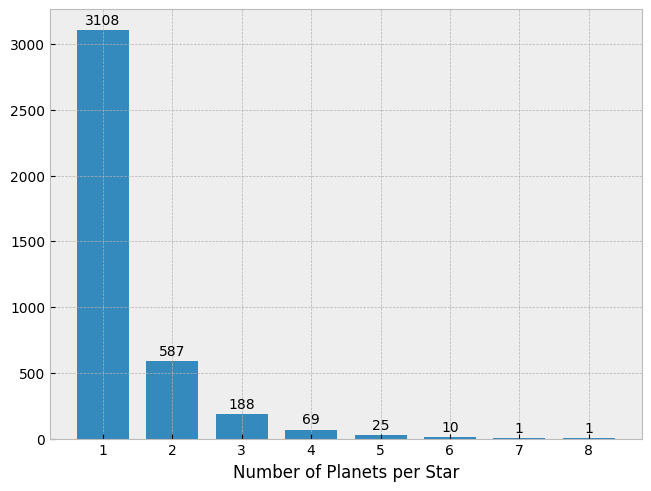

In [8]:
planet_count = stars.groupby('num_planets').agg(count=('num_planets', 'count')).sort_values(by='num_planets')
x = np.arange(len(planet_count))
width = 0.75
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
plt.xlabel('Number of Planets per Star')

for attribute, measurement in planet_count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
ax.set_xticks(x, planet_count.index[0:])
plt.show()